# Importing necesaary libraries


In [1]:
#Image Extraction

import os 
from zipfile import ZipFile

# Image Reader

from PIL import Image

#Data handling and analysis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#Data preprocessing

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.svm import SVC


# Importing the images

In [2]:
file_name = './expression_images_dataset.zip'
destination_path = './Expressions'

#Opening the zip file the read mode

with ZipFile(file_name,'r') as zip:
    print('Extracting the files')
    
    #Checking if the desrtination path exists or not
    
    if(not os.path.exists(destination_path)):
        zip.extractall(path = destination_path)
        print('Done')
    else:
        print('Destination directory already exists')
    

Extracting the files
Destination directory already exists


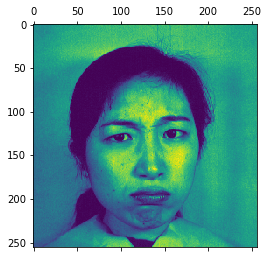

In [3]:
# Displaying the image

im = Image.open('./Expressions/images/KA.AN3.41.tiff')
im_array = np.array(im)
plt.matshow(im);

In [4]:
df = pd.read_csv("./Expressions/data.csv")

In [5]:
df.head()

,filepath,student,facial_expression
0,images/KA.AN1.39.tiff,KA,angry
1,images/KA.AN2.40.tiff,KA,angry
2,images/KA.AN3.41.tiff,KA,angry
3,images/KA.DI1.42.tiff,KA,disgust
4,images/KA.DI2.43.tiff,KA,disgust


In [6]:
df["facial_expression"].value_counts()

fear         32
happiness    31
sadness      31
angry        30
neutral      30
surprise     30
disgust      29
Name: facial_expression, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   filepath           213 non-null    object
 1   student            192 non-null    object
 2   facial_expression  213 non-null    object
dtypes: object(3)
memory usage: 5.1+ KB


In [8]:
#Data preparation

X =[]
for i in range(213):
    path = "./Expressions/"+ df.iloc[i][0]
    im = Image.open(path)
    #print(im)
#reshaping 256*256 images to 1D array of length 65536     
    imarray = np.array(im).reshape(65536)
    X.append(imarray)

In [9]:
X 

[array([105, 102, 108, ..., 119, 113, 119], dtype=uint8),
 array([114, 115, 116, ..., 115, 105, 105], dtype=uint8),
 array([ 96,  98, 114, ..., 120, 116, 117], dtype=uint8),
 array([109, 118, 102, ..., 124, 138, 134], dtype=uint8),
 array([114, 118, 115, ..., 133, 130, 138], dtype=uint8),
 array([130, 128, 118, ..., 142, 141, 140], dtype=uint8),
 array([102, 114, 103, ..., 128, 127, 133], dtype=uint8),
 array([111, 113, 111, ..., 144, 134, 139], dtype=uint8),
 array([113, 116, 115, ..., 135, 142, 139], dtype=uint8),
 array([ 85,  82,  95, ..., 122, 127, 138], dtype=uint8),
 array([ 94,  92,  99, ..., 146, 148, 150], dtype=uint8),
 array([104, 111, 124, ..., 117, 121, 125], dtype=uint8),
 array([113, 105, 122, ..., 129, 142, 134], dtype=uint8),
 array([103,  89,  98, ..., 105,  96,  87], dtype=uint8),
 array([131, 135, 134, ..., 124, 130, 127], dtype=uint8),
 array([143, 140, 133, ..., 141, 121, 127], dtype=uint8),
 array([116, 102, 115, ...,  95, 100, 105], dtype=uint8),
 array([142, 1

In [10]:
len(X[0])

65536

In [11]:
y = df[["facial_expression"]]

In [12]:
# Feature Scaling

sc = StandardScaler()

x = sc.fit_transform(X)

In [13]:
x

array([[-0.43361499, -0.52131436, -0.41267217, ..., -0.09235734,
        -0.33892632, -0.09873761],
       [-0.17287474, -0.14313268, -0.17646344, ..., -0.25294603,
        -0.65538136, -0.65011503],
       [-0.69435525, -0.63767795, -0.23551563, ..., -0.05221017,
        -0.22025568, -0.17750581],
       ...,
       [ 1.33362453,  1.31141222,  1.15221065, ...,  1.393088  ,
         1.67847457,  1.24032185],
       [ 0.66728832,  1.02050324,  1.15221065, ...,  1.07191063,
         1.16423512,  0.92524904],
       [ 1.07288427,  0.90413965,  1.18173674, ...,  1.43323517,
         1.55980393,  1.71293107]])

In [14]:
#Label encoder

le =LabelEncoder()
y = le.fit_transform(y)

C:\Users\celestin jacob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [16]:
df["facial_expression"].unique()

array(['angry', 'disgust', 'fear', 'happiness', 'neutral', 'sadness',
       'surprise'], dtype=object)

In [17]:
le.inverse_transform([6])

array(['surprise'], dtype=object)

In [18]:
#TRAIN TEST SPLIT

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state= 8 )

In [19]:
#model building

svm = SVC(kernel= "linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
#MODEL EVALUATION

svm.score(X_test,y_test)

0.8372093023255814

In [21]:
svm.score(X_train,y_train)

1.0

In [22]:
stf = StratifiedKFold(n_splits=10)

In [23]:
cross_val_score(estimator=svm, X=x, y=y, cv=stf)

array([0.59090909, 0.68181818, 0.5       , 0.19047619, 0.71428571,
       0.28571429, 0.47619048, 0.57142857, 0.28571429, 0.52380952])

In [24]:
np.mean(cross_val_score(estimator=svm, X=x, y=y, cv=stf))

0.482034632034632

In [25]:
np.std(cross_val_score(estimator=svm, X=x, y=y, cv=stf))

0.1667005362785684

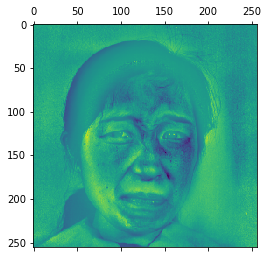

In [28]:
plt.matshow(X_test[15].reshape(256,256));

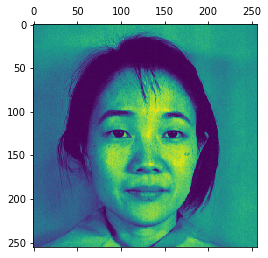

Actual expression : ['angry'] 
 Predicted Expressions: ['happiness']


In [31]:
actual = le.inverse_transform([y[25]])
svm_pred = svm.predict([X_test[25]])
predicted = le.inverse_transform(svm_pred)
output = sc.inverse_transform([X_test[25]])
plt.matshow(output.reshape(256,256))
plt.show()
print(f"Actual expression : {actual} \n Predicted Expressions: {predicted}")